Binomial
from scipy.stats import binom
binom.pmf(k, n, p) / cdf
p = probabilidade de sucesso
n = número de tentativas
k = probabilidade de k sucessos

from scipy.stats import poisson
poisson.pmf(x, l)
poisson.cdf(x, l)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### __1.__ Escolha: Poisson, Gauss, Binomial ou nda. Justifique

__a.__ Numa experiência anonimizada, foi dada a 500 pacientes uma nova vacina contra covid-19, com probabilidade para cada pessoa de 10% de ser a vacina, e 90% de ser placebo. Em seguida foram recolhidas 100 pessoas para realizarem testes.

_Binomial, pois é uma distribuição que pode ser respondida com sim ou não (tomou a vacina ou não tomou) e os resultados são independentes dos anteriores._

__b.__ Numa determinada amostra com N=6 mil cintigrafias renais com dados de muitos hospitais, a dose é dada de acordo com o peso. Determinou-se que o valor médio da dose efetiva para pessoas com 70 kg era de 4,2 mSv, com um desvio padrão de 0,4 mSv.

_Distribuição Gaussian, pois é uma distribuição modelada a partir de uma função normal, com valor médios e desvio padrão._

__c.__ Num determinado hospital, a taxa de ocupação média semanal ao fim de uma ano das camas da UCI é de 11%. Qual a probabilidade de mais de 5% das camas estarem ocupadas numa semana?

_Escolheria a distribuição de Poisson, pois tem uma frequência em um intervalo, algo que define a utilização desta distribuição._

__d.__ Foram feitos 10 estudos de blindagem diferentes para um novo labirinto num centro de radioterapia. Destes, 5 tinham os cálculos certos, 5 estavam errados. O João escolheu 4 trabalhos ao calhas para mostrar a um colega.

_Não escolheria nenhuma das alternativas, pois neste caso, com poucos valores os resultados não são independentes, não sendo eficiente utilizar nenhuma delas_

__e.__ Num determinado país com 10 milhões de habitantes a taxa incidência de uma determinada doença é de 1,2%/ano. Qual a probabilidade de pelo menos mil pessoas contraírem a doença em uma semana?

_Este caso utilizaria Poisson, pela mesma razão do exercício c, existe aqui um intervalo de tempo na distribuição._

### 2. Resolva a), c) e e)

__a.__ Numa experiência anonimizada, foi dada a 500 pacientes uma nova vacina contra covid-19, com probabilidade para cada pessoa de 10% de ser a vacina, e 90% de ser placebo. Em seguida foram recolhidas 100 pessoas para realizarem testes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binom

p = 0.1 # probabilidade de sucesso: ser vacinada
n = 100 # número de tentativas: 100 pessoas escolhidas ao acaso
k = [] # lista de probabilidades de sucessos
count = 0
for i in range(50):
    count = count + 1
    k.append(count)

In [3]:
def f(k, n, p):
    return binom.pmf(k, n, p)

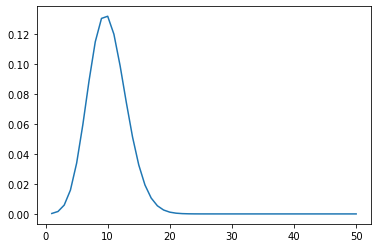

In [4]:
plt.plot(k, f(k, n, p))

__c.__ Num determinado hospital, a taxa de ocupação média semanal ao fim de uma ano das camas (4000) da UCI é de 11%. Qual a probabilidade de mais de 5% das camas estarem ocupadas numa semana?

In [5]:
N = 4000 # camas
lambda_semanal = N*0.11
x_semanal = N*0.05

In [6]:
from scipy.stats import poisson
pois = poisson.cdf(x_semanal, lambda_semanal) # ocupadas
print('até 5%: a probabilidade é de:', pois)

até 5%: a probabilidade é de: 9.243426699186764e-38


In [7]:
resultado = 1-pois
print('a probabilidade de mais de 5% é:', resultado) # aqui me esqueci como aumentam os zeros

a probabilidade de mais de 5% é: 1.0


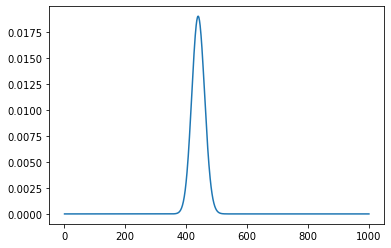

In [8]:
x = []
count = 0
for i in range(1000):
    count = count + 1
    x.append(count)
l = lambda_semanal

def f(x,l):
    return poisson.pmf(x,l)

plt.plot(x, f(x,l))

__e.__ Num determinado país com 10 milhões de habitantes a taxa incidência de uma determinada doença é de 1,2%/ano. Qual a probabilidade de pelo menos mil pessoas contraírem a doença em uma semana?

In [9]:
N = 10000000
lambda_ano = N*0.012; lambda_ano

120000.0

In [10]:
semanas_ano = 365.25/7

In [11]:
labda_semana = lambda_ano/semanas_ano; labda_semana

2299.794661190965

In [12]:
poiss = poisson.cdf(1000, lambda_semanal); poiss

1.0

In [13]:
1 - poiss

0.0

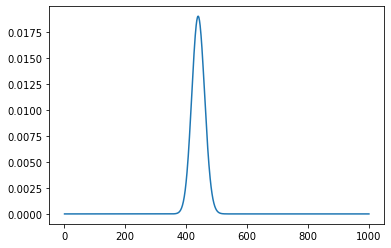

In [14]:
x = []
count = 0
for i in range(1000):
    count = count + 1
    x.append(count)
l = lambda_semanal

def f(x,l):
    return poisson.pmf(x,l)

plt.plot(x, f(x,l))

### 3.

In [15]:
V = 1.5*pow(10,-6); interacoes_por_particula = 20

__a.__

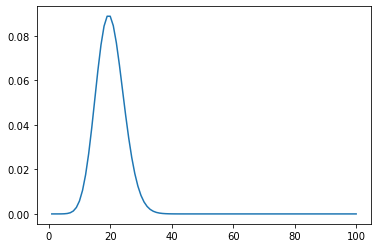

In [17]:
x = []
count = 0
for i in range(100):
    count = count + 1
    x.append(count)
l = interacoes_por_particula
def f(x,l):
    return poisson.pmf(x,l)
plt.plot(x, f(x,l))

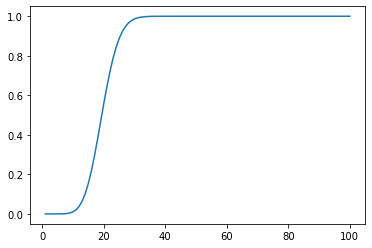

In [20]:
plt.plot(x, poisson.cdf(x,l))

__b. i.__ pelo menos 20 interações

In [19]:
1 - poisson.cdf(20,l)

0.44090741576867487

__b. ii.__ pelo menos 10 interações

In [21]:
1 - poisson.cdf(10,l)

0.9891882811733472

__c. i.__ até 30 interações

In [22]:
poisson.cdf(30,l)

0.9865253187200778

__c. ii.__ até 40 interações

In [23]:
poisson.cdf(40,l)

0.9999745736817659

__d.__ Gráfico em Gy = J/Kg

In [30]:
Energia_por_interacao = 1000 #eV
#ev to J
E_J = 1.609*pow(10,-16)

V = 1.5*pow(10,-6) #m²

densidade = 1 #gcm³
d = 1000 #gm³

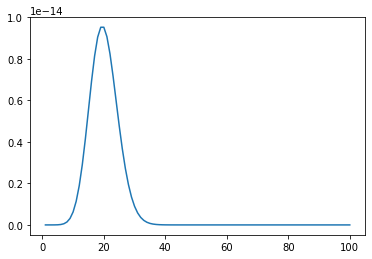

In [31]:
x = []
count = 0
for i in range(100):
    count = count + 1
    x.append(count)
l = interacoes_por_particula

poisson.pmf(x,l) # prob. por interação

#dose_por_interacao = ?

def dose_por_interacao(x,l):
    
    massa = d*V
    dose = E_J/massa
    return dose*poisson.pmf(x,l)

plt.plot(x, dose_por_interacao(x,l))